In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/data01/AMPolyCalc/code')
from rw_utils import read_raw_data_1X, save_path
from recon import recon_slice
from tomo_encoders.reconstruction.recon import recon_all
from tomo_encoders.misc.voxel_processing import cylindrical_mask
from tomo_encoders.misc import viewer
import pandas as pd

In [2]:
sample_num = 1
layer = 2
projs, theta, center_guess, dark, flat = read_raw_data_1X(sample_num, layer)

In [3]:
center_guess = 1224
search_width = 25
search_res = 1
num = int(search_width/search_res + 1)

In [4]:
centers = np.linspace(-search_width//2+center_guess,search_width//2+center_guess,num, endpoint = True)

In [5]:
images = []
for ii, center in enumerate(centers):
    image = recon_slice(projs, theta, center, dark, flat, 0.5, 3.13)[np.newaxis,...]
    cylindrical_mask(image, 1.0, mask_val = image.min())
    image = image[0]
    images.append(image)
    print(r'%i of %i'%(ii, len(centers)), end = ";")

0 of 26;1 of 26;2 of 26;3 of 26;4 of 26;5 of 26;6 of 26;7 of 26;8 of 26;9 of 26;10 of 26;11 of 26;12 of 26;13 of 26;14 of 26;15 of 26;16 of 26;17 of 26;18 of 26;19 of 26;20 of 26;21 of 26;22 of 26;23 of 26;24 of 26;25 of 26;

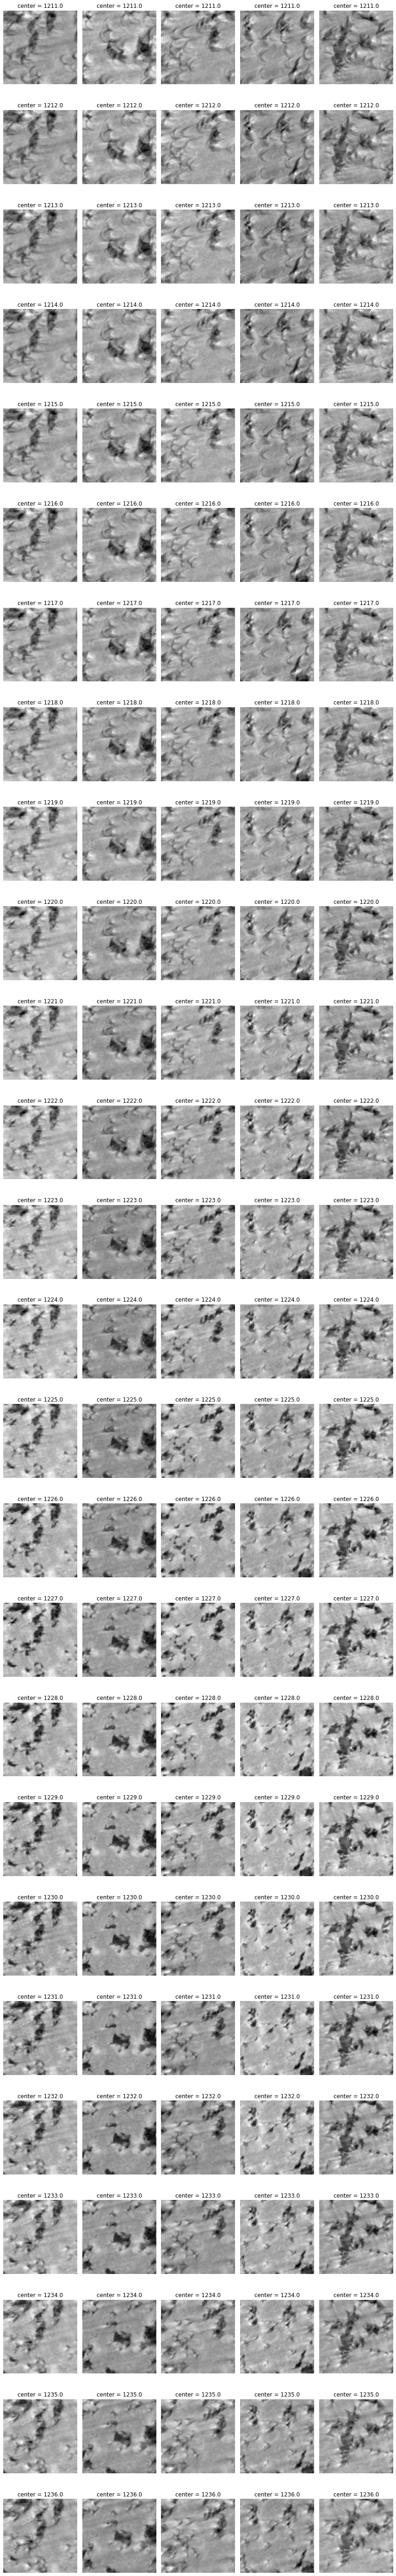

In [6]:
s = []
s.append((slice(500,750), slice(500,750)))
s.append((slice(500,750), slice(1750,2000)))      
s.append((slice(1500,1750), slice(500,750)))
s.append((slice(1500,1750), slice(1750,2000)))
s.append((slice(200,450), slice(1000,1250)))
fig, ax = plt.subplots(len(images),5, figsize = (12,len(images)/4.0*12))
for ii in range(len(images)):
    for i4 in range(5):
        ax[ii,i4].imshow(images[ii][s[i4]], cmap = 'gray')
        ax[ii,i4].set_title(f"center = {centers[ii]}")
        ax[ii,i4].axis('off')
fig.tight_layout()

## Write Center to CSV File

In [7]:
# correct_center = center_guess
correct_center = 1228
image = images[np.argmin(np.abs(centers-correct_center))]

<AxesSubplot:>

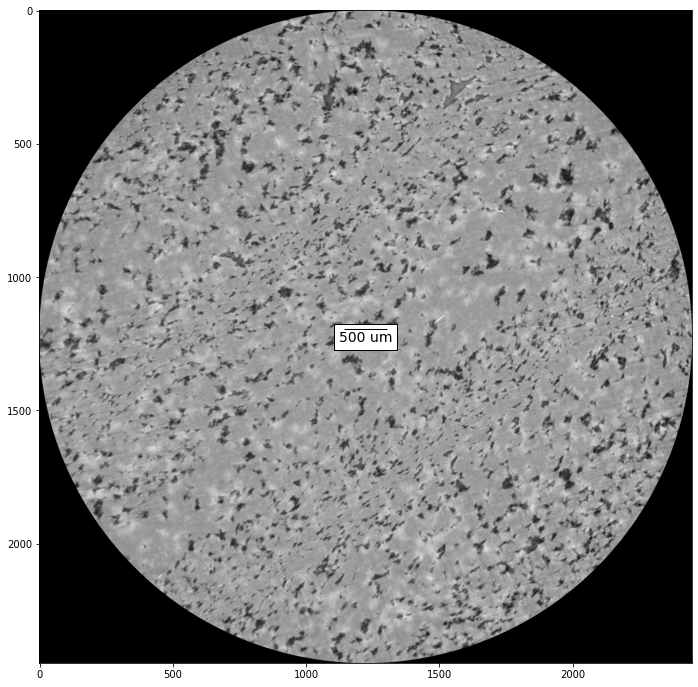

In [8]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
ax.imshow(image, cmap = 'gray')
viewer.add_scalebar(ax, 500, 3.13, fontsize = 14, loc = 'center')
# ax.axis('off')

In [9]:
df = pd.read_csv(save_path)
df.loc[(df["sample_num"] == sample_num) & (df["layer"] == layer),"rot_cen"] = correct_center
df.to_csv(save_path,index = False)